1번

(Text(0.5, 0, 'Time[Sec]'), Text(0, 0.5, 'Amplitude'))

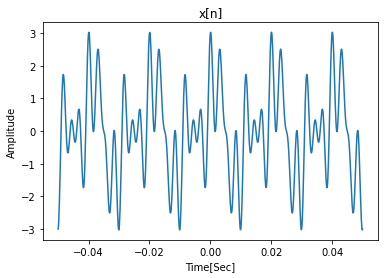

In [15]:
#(a)
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

fs = 1000
t = np.linspace(-0.05,0.05,fs)202
x = np.cos(2 * np.pi * 50 * t) + np.sin(2 * np.pi *100 * t) +np.cos(2 * np.pi *250 * t) +np.cos(2 * np.pi *350* t)

plt.plot(t, x), plt.title("x[n]")
plt.xlabel('Time[Sec]'), plt.ylabel('Amplitude')

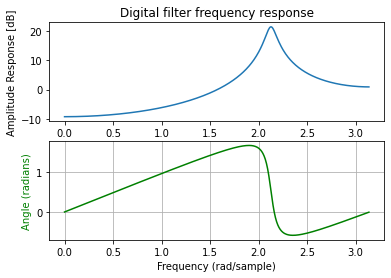

In [26]:
#(b)
'''H(z) = 1 / (1 + z^(-1) + 0.9z^(-2))'''

b = np.array([1.0])
a = np.array([1.0, 1.0, 0.9])
w, h = signal.freqz(b,a)

Mag = 20 * np.log10(np.abs(h))
Ang = angles = np.unwrap(np.angle(h))

plt.subplot(2,1,1), plt.plot(w, Mag)
plt.title('Digital filter frequency response')
plt.ylabel('Amplitude Response [dB]')
plt.xlabel('Frequency (rad/sample)')

plt.subplot(2,1,2), plt.plot(w, Ang, 'g')
plt.ylabel('Angle (radians)', color='g')
plt.xlabel('Frequency (rad/sample)')
plt.grid()
plt.show()

Text(0.5, 0, 'Frequency (rad/sample)')

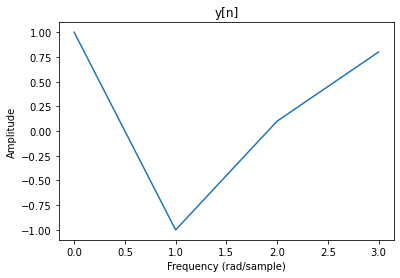

In [24]:
#(c)
y = signal.lfilter(b,a,x) 
plt.plot(y)
plt.title('y[n]')
plt.ylabel('Amplitude')
plt.xlabel('Frequency (rad/sample)')

#(d)
y[n]은 HPF 필터의 역할을 한다.

2번

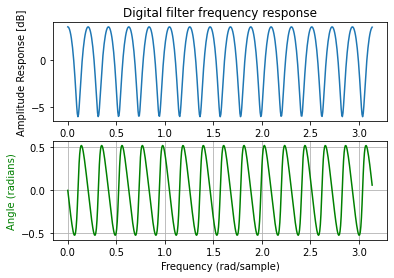

In [33]:
#(a)
'''H(z) = 1 +0.5z^(-1)'''

b = np.zeros(31)
b[0]=1
b[30]=0.5

a = np.array([1.0])
w, h = signal.freqz(b,a)

Mag = 20 * np.log10(np.abs(h))
Ang = angles = np.unwrap(np.angle(h))

plt.subplot(2,1,1), plt.plot(w, Mag)
plt.title('Digital filter frequency response')
plt.ylabel('Amplitude Response [dB]')
plt.xlabel('Frequency (rad/sample)')

plt.subplot(2,1,2), plt.plot(w, Ang, 'g')
plt.ylabel('Angle (radians)', color='g')
plt.xlabel('Frequency (rad/sample)')
plt.grid()
plt.show()

Text(0.5, 0, 'Frequency (rad/sample)')

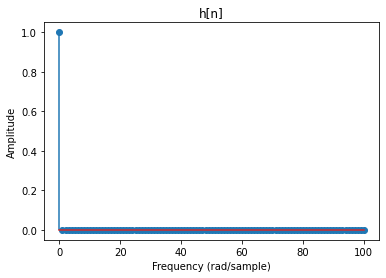

In [74]:
#(b)
x =np.zeros(101)
x[0]=1

h = signal.lfilter(b,a,x) 

plt.stem(h)
plt.title('h[n]')
plt.ylabel('Amplitude')
plt.xlabel('Frequency (rad/sample)')

Text(0.5, 0, 'Sample[n]')

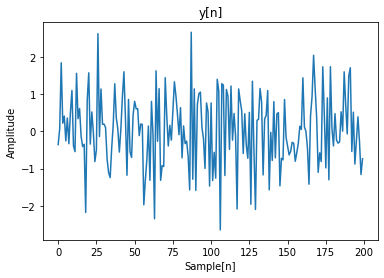

In [75]:
#(c)
x = np.random.randn(200)
y = signal.lfilter(b,a,x) 
plt.plot(y)
plt.title('y[n]')
plt.ylabel('Amplitude')
plt.xlabel('Sample[n]')

'선형시스템은 샤프닝 역할을 한다.'

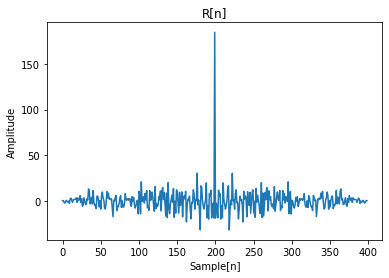

In [77]:
#(d)
def convolution(x, h):
    lengthA=len(x) # x[n] 의 길이
    lengthB=len(h) # h[n] 의 길이
    y = np.zeros(lengthA + lengthB -1) # y[n] 의 길이
    
    for m in np.arange(lengthA): #x[n]의 길이
        for n in np.arange(lengthB):
            y[m+n] = y[m+n] + x[m] * h[n]
    return y

def correlation(x,h):
    y = convolution(x,h[::-1])
    return y

Rn = correlation(y,y)
plt.plot(Rn),plt.title('R[n]')
plt.ylabel('Amplitude')
plt.xlabel('Sample[n]')

'''선형시스템은 샤프닝 역할을 한다.'''

3번

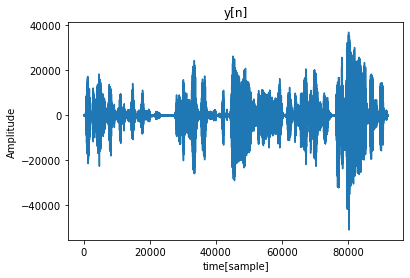

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import pygame
import pygame.mixer
from time import sleep
def Play_sound(filename):
    pygame.mixer.init()
    sound = pygame.mixer.Sound(filename)
    tmp = sound.play()
    while tmp.get_busy():
        pygame.time.delay(1)

b = np.zeros(3001)
b[0]=1
b[3000]=0.8
a = np.array([1.0])

rate, data = wavfile.read('./오디오샘플/dt.wav')

y = signal.lfilter(b,a,data) 
plt.plot(y), plt.title('y[n]'), plt.xlabel('time[sample]'),plt.ylabel('Amplitude')
y = np.cast['int16'](y)

wavfile.write('dt_3.wav',rate,y)
Play_sound('dt_3.wav')

소리가 중첩되서 들린다.